In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_quiz.csv to dataset_quiz.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('dataset_quiz.csv')
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
# Mengganti nilai yang berupa string menjadi nilai yang berupa angka menggunakan labelencoder dari fungsi encoding
df['skema'] = encode.fit_transform(df['skema'])
df['luaran_hki'] = encode.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki'] = encode.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki'] = encode.fit_transform(df['potensi_hki'])
df['luaran_lain'] = encode.fit_transform(df['luaran_lain'])
df['jenis_luaran_lain'] = encode.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain'] = encode.fit_transform(df['status_luaran_lain'])

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,1,1,1,2,0,3,1
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,1,1,1,2,0,3,1
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,1,1,1,2,0,3,1
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,1,1,1,2,0,3,1
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,1,1,1,2,0,3,1


In [ ]:
# Seleksi fitur

# Slice dataframe  dari kolom 'jml_vltr_terlibat' hingga kolom 'status_luaran_lainnya'
X = df.iloc[:,7:]
y = df['keterlibatan_vltr']
y = y.map({'YA':1, 'TIDAK':0}) # Encode label

X.head()

,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,0,2019,1,1,1,2,0,3,1
1,0,2019,1,1,1,2,0,3,1
2,0,2019,1,1,1,2,0,3,1
3,0,2019,1,1,1,2,0,3,1
4,0,2019,1,1,1,2,0,3,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Metode Klasifikasi DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 1.00
Test set accuracy: 1.0


# Metode Klasifikasi RandomForest

In [ ]:
# Pada kasus kali ini kita akan menggunakan estimator pada RandomForest

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 1.00
Test set accuracy: 1.0


# Metode Klasifikasi SVM

In [ ]:
# Karena asumsi adalah data terdistribusi secara normal,
# maka kita perlu melakukan standarisasi

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Standarisasi pada fitur di X_train dan X_test
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC 
from sklearn.ensemble import VotingClassifier

In [ ]:
# Model SVM linier tanpa tunnning hyperparameter
svm_lin = SVC(kernel='linear')

# Fit ke model
svm_lin.fit(X_train_std, y_train)

# Prediksi
y_pred_svm_lin = svm_lin.predict(X_test_std)

# Evaluasi akurasi testing data
acc_svm_lin = accuracy_score(y_test, y_pred_svm_lin)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_svm_lin))
print(f"Test set accuracy: {acc_svm_lin}")

Test set accuracy: 0.94
Test set accuracy: 0.9411764705882353


# Metode Klasifikasi Voting

In [ ]:
# Definisikan algoritma yang akan digunakan untuk voting

clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='rbf', probability=True)

# model hard voting
voting = VotingClassifier(estimators=[('SVM-LIN', clf1), ('SVM-RBF', clf2)], voting='hard')

# Fit model
voting.fit(X_train_std, y_train)

# Prediksi
y_pred_vt1 = voting.predict(X_test_std)

# Evaluasi akurasi testing data
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Print hasil evaluasi
print('Voting Hard')
print("Test set accuracy: {:.2f}".format(acc_vt1))
print(f"Test set accuracy: {acc_vt1}")

Voting Hard
Test set accuracy: 0.94
Test set accuracy: 0.9411764705882353


# Implementasi hasil akurasi dari klasifikasi metode

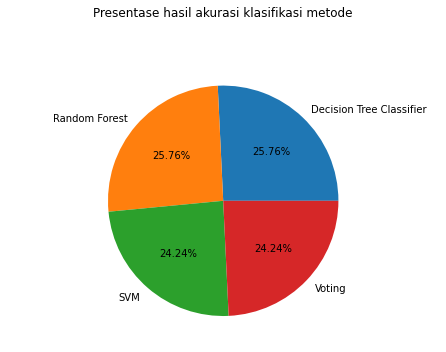

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Metode = ['Decision Tree Classifier', 'Random Forest', 'SVM', 'Voting']
Nilai = [acc_dt,acc_rf,acc_svm_lin,acc_vt1]
ax.pie(Nilai,labels=Metode,autopct='%1.2f%%')
plt.title('Presentase hasil akurasi klasifikasi metode', y=1.12) 
plt.show()

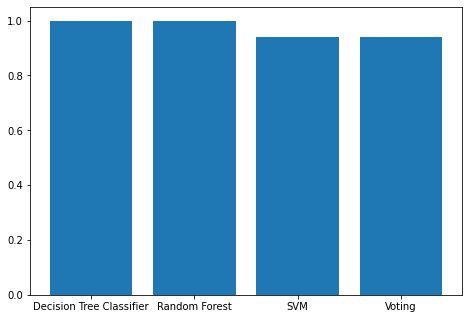

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Metode = ['Decision Tree Classifier', 'Random Forest', 'SVM', 'Voting']
Nilai = [acc_dt,acc_rf,acc_svm_lin,acc_vt1]
ax.bar(Metode,Nilai)
plt.show()